<a href="https://colab.research.google.com/github/JyotsnaPatil27/Jyo_code/blob/master/Astro_research/ASS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.fftpack as syfp
import scipy.signal as signal
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! ls

drive  sample_data


In [ ]:
data = open("/content/drive/My Drive/Data/PNsspec_500assy2.dat","r").readlines()
len(data)

9755

In [ ]:
data1 = []
for x in data:
    data1.append(float(x.strip(' ')))
data2 = np.array(data1)
data2

array([4.19192093e+08, 4.19192095e+08, 4.19192097e+08, ...,
       4.19274596e+08, 4.19274604e+08, 4.19274605e+08])

In [ ]:
reference_time = np.median(data2)
t_0 = reference_time
phase_zero_index = np.argsort(data2)[len(data2)//2]
t_0, reference_time,phase_zero_index

(419232335.922371, 419232335.922371, 4877)

In [ ]:
spin_frequency = "f_0"
f_0 = 20.5851
frequency_derivative = "f_dot"
f_dot = -3.648E-11
delta_t = data2 - t_0
phase_zero = delta_t[4877::4878]
len(delta_t), phase_zero

(9755, array([0.]))

In [ ]:
#Taylor's expansion
phase_i = phase_zero + (f_0*delta_t) +(0.5*f_dot*np.square(delta_t))
len(phase_i)

9755

In [ ]:
phase = np.floor(phase_i) - phase_i
frac_phase = -phase
len(frac_phase)

9755

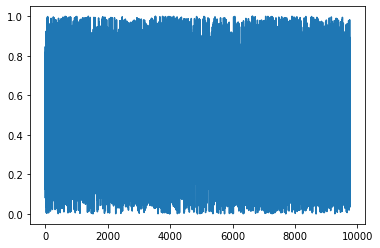

In [ ]:
plt.plot(frac_phase)
plt.show()

In [ ]:
#Zn-test statistics
Narray = len(frac_phase)
Z21n = np.square(np.sum(np.cos(frac_phase))) + np.square(np.sum(np.sin(frac_phase)))
Z22n = Z21n +(np.square(np.sum(np.cos(2*frac_phase))) + np.square(np.sum(np.sin(2*frac_phase))))
Z21 = 2/Narray*Z21n
Z22 = 2/Narray*Z22n
Z21, Z22

(17947.635939776985, 31796.612514475368)

In [ ]:
Z21_1 = 2/Narray*(np.square(np.sum(np.cos(frac_phase))) + np.square(np.sum(np.cos(frac_phase))))
Z22_1 = Z21_1 + (2/Narray*(np.square(np.sum(np.cos(2*frac_phase))) + np.square(np.sum(np.cos(2*frac_phase)))))
Z21_1, Z22_1

(27613.547188127413, 35655.668374226014)

In [ ]:
freq = np.arange(20.5850,20.5852,2.050231e-8)
Z21s_array =[]
Z22s_array =[]
for i in range(Narray):
  phase = freq[i]*delta_t + 0.5*f_dot*np.square(delta_t)
  frac_phi = 2*np.pi*(phase-np.floor(phase))
  Z21s = 2/Narray*(np.square(np.sum(np.cos(frac_phi))) + np.square(np.sum(np.sin(frac_phi))))
  Z22s = 2/Narray*(Z21 + (np.square(np.sum(np.cos(2*frac_phi))) + np.square(np.sum(np.sin(2*frac_phi)))))
  Z21s_array.append(Z21s)
  Z22s_array.append(Z22s)


In [ ]:
len(Z21s_array), len(Z22s_array)

(9755, 9755)

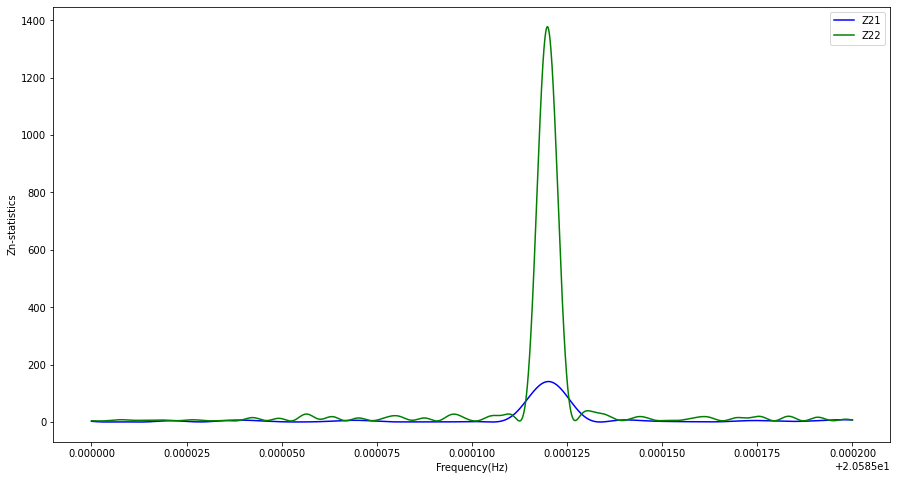

In [ ]:
x = np.arange(20.5850,20.5852,2.050231e-8)
y1 = Z21s_array
y2 = Z22s_array
plt.figure(figsize=(15,8))
plt.plot(x, y1, 'b-');
plt.plot(x, y2, 'g-');
plt.xlabel('Frequency(Hz)');
plt.ylabel('Zn-statistics');
plt.legend(['Z21', 'Z22'])
plt.show()

In [ ]:
max_freq_Z21 = freq[np.argmax(Z21s_array)]
max_freq_Z22 = freq[np.argmax(Z22s_array)]
max_freq = [max_freq_Z21, max_freq_Z22]
max_freq

[20.58512008202489, 20.58511981549487]

In [ ]:
max_freq = 20.58512
new_phase = phase_zero + (max_freq*delta_t) +(0.5*f_dot*np.square(delta_t))
new_phase

array([-828408.28083702, -828369.95887467, -828332.72428034, ...,
        869921.25461702,  870089.82658418,  870117.88092965])

In [ ]:
phases = np.floor(new_phase) - new_phase
new_frac_phase = -phases
new_frac_phase

array([0.71916298, 0.04112533, 0.27571966, ..., 0.25461702, 0.82658418,
       0.88092965])

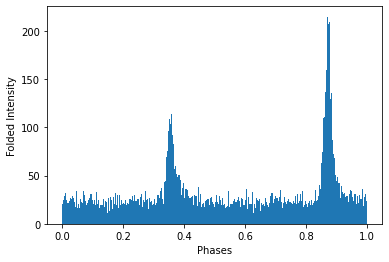

In [ ]:
plt.hist(new_frac_phase, 300);
plt.xlabel('Phases');
plt.ylabel('Folded Intensity');
plt.show()